# Example of how to remove a frae from subplots, setup colorbar with colors for values outside a desired range, and decide on the minor units for axis ticks

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For colorbar positioning
from mpl_toolkits.axes_grid1 import make_axes_locatable
# For minor ticks
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

%matplotlib notebook

Defining a dataset

In [5]:
df = pd.DataFrame(
    {'detector': np.arange(1, 27), 
     'variable01': np.random.randint(1, high=50, size=len(np.arange(1, 27)), dtype=int), 
     'variable02': np.random.randint(100, high=300, size=len(np.arange(1, 27)), dtype=int),
     'feature01': np.sin(np.arange(1, 27)),
     'feature02': np.tan(np.arange(1, 27)),
     'sizes': np.random.randint(40, high=100, size=len(np.arange(1, 27)), dtype=int),
    }
)

Lets plot!

<IPython.core.display.Javascript object>


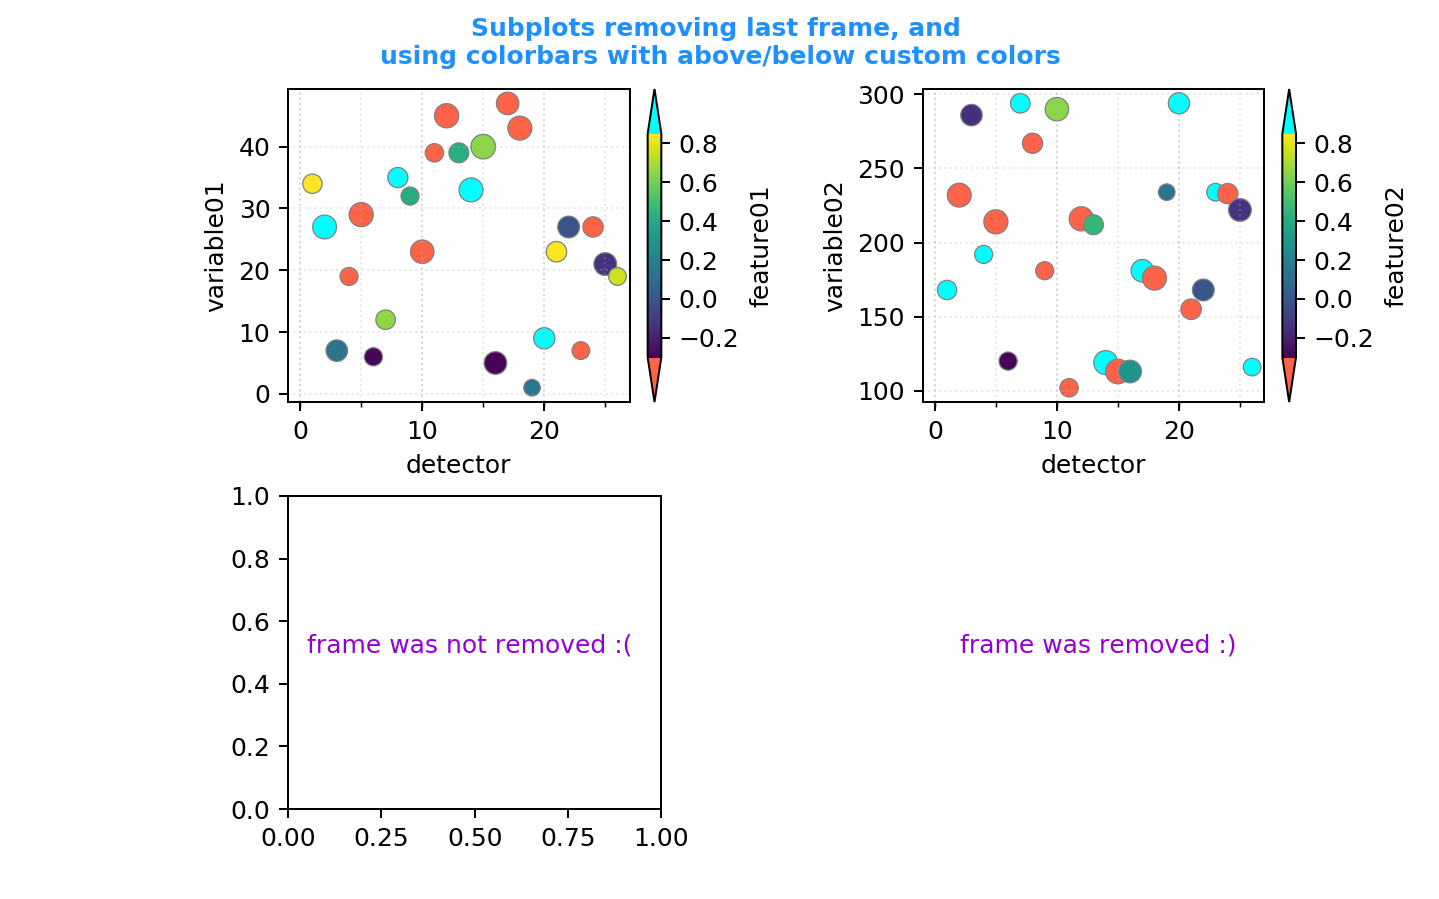

In [7]:
# We want to force minor locator to be each 5 units in x
minor_interval = 5
minorLocator = MultipleLocator(minor_interval)

var = [colname for colname in df.columns if 'variable' in colname]
ft = [f for f in df.columns if 'feature' in f]

fig, ax = plt.subplots(2, 2, figsize=(8, 5), sharex=False, sharey=False)
for idx, axis in enumerate(ax.flatten()):
    # We explicity want to plot only 3 boxes
    if (idx < len(var)):
        # Subselection of dataframe
        im = axis.scatter(df['detector'], df[var[idx]], 
                          c=df[ft[idx]],
                          s=df['sizes'],
                          vmax=0.85, 
                          vmin=-0.3,
                          cmap='viridis',
                          edgecolors='gray',
                          linewidth=0.5,
                          )
        # Create the subgrid for the colorbars
        divider = make_axes_locatable(axis)
        caxis = divider.append_axes('right', size='4%', pad=0.1)
        # For the upper/lower values we use extend
        plt.colorbar(im, cax=caxis, 
                     extend='both', 
                     extendfrac=0.2, 
                     label=r'feature{0:02}'.format(idx + 1)) # or fig.colorbar(im, cax=caxis)
        # Set colors for values outside the colorbar
        im.cmap.set_under('tomato')
        im.cmap.set_over('aqua')
        # Force axis limits
        axis.set_xlim([-1, 27])
        # Set minor locator by hand, as a customization
        axis.xaxis.set_minor_locator(minorLocator)
        # Set grid
        axis.grid(which='minor', alpha=0.3, linestyle='dotted')
        axis.grid(which='major', alpha=0.3, linestyle='dotted')
        # Axis labels
        axis.set_ylabel(var[idx])
        # Axis labels
        axis.set_xlabel('detector')
    elif (idx == 2):
        axis.text(0.05, 0.5, 'frame was not removed :(', transform=axis.transAxes, 
                  color='darkviolet')
    else:
        # If we ant to erase additional frames, use teh following
        axis.axis('off')
        axis.text(0.1, 0.5, 'frame was removed :)', transform=axis.transAxes, 
                  color='darkviolet')

# Fine tuning the spacing
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9,                         
                    hspace=0.3, wspace=0.7)
# Title for all subplots
plt.suptitle('Subplots removing last frame, and \nusing colorbars with above/below custom colors', 
             color='dodgerblue', fontweight='bold', fontsize=10)

# Save as png
plt.savefig('subplot_example.png', format='png', dpi=300)